In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [27]:
# Funcion que  extraen los datos para un solo articulo
# link de ejemplo   https://www.amazon.com.mx/granja-los-cuerpos-Patricia-Cornwell/dp/6075293760/ref=sr_1_21?dchild=1&qid=1600445283&s=books&sr=1-21

def extract(linkArticulo):
    
    datos=[]
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get(linkArticulo, headers=headers)
    soup = BeautifulSoup(r.content, "html")
    
#titulo
    aux=soup.find_all('span',{'class': 'a-size-extra-large'})
    
    if(aux):
        titulo=aux[0].get_text()
        datos.append(titulo)
        print(titulo)
    else:      #en caso de que no encuentre el nombre guarda un valor nulo para que el programa no de error
        titulo="NULL"
        datos.append("NULL")
        print(titulo)
    
# precio
    aux=soup.find_all('span',{'class': 'inlineBlock-display'})
    
    if(aux):
        precio=aux[0].get_text()
        datos.append(precio)
        print(precio)
    else:
        precio="0"
        datos.append("0")
        print(precio)
    
# estrellas
    aux=soup.find_all('span',{'class': 'a-icon-alt'})
    
    if(aux):
        estrellas=aux[0].get_text()
        datos.append(estrellas)
        print(estrellas)
    else:
        estrellas="0"
        datos.append("0")
        print(estrellas)
        
        
#  obtiene link a opiniones (imagen1)
    aux=soup.find_all('a',{'data-hook': 'see-all-reviews-link-foot'})
    linkRev=aux[0].get('href')
    linkRev="https://www.amazon.com.mx"+linkRev
    print(linkRev)
    
#   saca todas las opiniones
    #funcion
    auxx=sacaOpiniones(linkRev)
    opiniones=auxx[0]
    print("Numero de Opiniones: ",opiniones.shape)
    
    #guarda
      #abre y guarda en el csv
    frame=pd.read_csv('Comentarios.csv')
    frame2=pd.DataFrame(data=opiniones,columns=["Estrellas","Opinion","Id","Titulo"])
    res=frame.append(frame2,sort=False)
    res.to_csv('Comentarios.csv', header=True, index=False)

    
    

imagen1

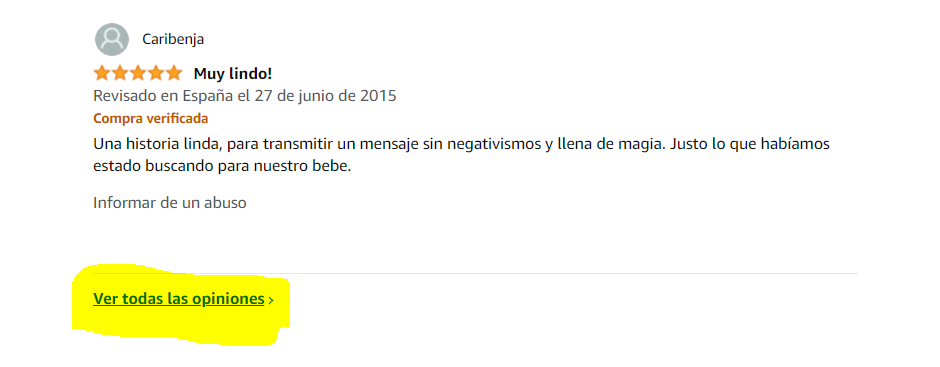

In [28]:
extract("https://www.amazon.com.mx/El-misterioso-caso-del-oso/dp/6071600138/ref=sr_1_30?dchild=1&qid=1600445283&s=books&sr=1-30")


El misterioso caso del oso


$152.00

4.8 de 5 estrellas
https://www.amazon.com.mx/El-misterioso-caso-del-oso/product-reviews/6071600138/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
Numero de Opiniones:  (21, 4)


In [29]:
# funcion que saca las opiniones a partir del link "Ver todas las opiniones" (imagen1)
def sacaOpiniones(link):    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}   
    r = requests.get(link, headers=headers)
    soup = BeautifulSoup(r.content, "lxml")
    
    
    #   sacamos id
    #nota los primeros dos no sirven
    nombre=soup.find_all('span',{'class': 'a-profile-name'})

    #sacamos opinion
    opinion=soup.find_all('span',{'data-hook': 'review-body'})

    #sacamos estrella asignada
    estrella=soup.find_all('i',{'data-hook': 'review-star-rating'})
    
    #sacamos titulo
    tit=soup.find_all('h1',{'class': 'a-size-large a-text-ellipsis'})
    tit=tit[0].find('a').get_text()
    
    #declara el np.array
    opiniones = np.array([[0, 0, 0,0]])

    #iteramos para guardar
    for i in range(len(estrella)):
        opiniones = np.append(opiniones, [[estrella[i].get_text(),opinion[i].get_text(),nombre[i].get_text(),tit]], axis = 0)

    bandera=0
    #elimina el elemento 0
    opiniones=np.delete(opiniones, 0, axis=0)
    
    #entramos a la pag sig
    try:
        aux=soup.find_all('li',{'class': 'a-last'}) 
        pagSig=aux[0].find('a').get('href')
        
        pagSig="https://www.amazon.com.mx"+pagSig
        
# hace llamado recursivo
        res=sacaOpiniones(pagSig)
        opinionesAux=res[0]
        bandera=res[1]
        opiniones = np.append(opiniones,opinionesAux, axis = 0)
    except:
        return (opiniones,1)
        
    if(bandera==1):
        return (opiniones,1)

In [30]:
#funcion que hace el raspado automatico a partir de un link padre (imagen2)

def raspado(linkPadre):
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    r = requests.get(linkPadre, headers=headers)
    soup = BeautifulSoup(r.content, "lxml")
   

    #Extrae los links de articulos
    links = soup.find_all('a',{'class': 'a-link-normal s-access-detail-page s-color-twister-title-link a-text-normal'})
    
    if(links):
        items=[]
        #print("caso 1")
        for link in links:
            print(link.get('href'))
            items.append(link.get('href'))
            #se llama a la funcion que realiza la extraccion de datos
            extract(link.get('href'))
            print ("libro terinado")
    else:
        links = soup.find_all('h2',{'class': 'a-size-mini a-spacing-none a-color-base s-line-clamp-2'})
        items=[]
        #print("caso 2")
        for link in links:
            items.append("https://www.amazon.com.mx"+link.find('a').get('href'))
            print("https://www.amazon.com.mx"+link.find('a').get('href'))
            #se llama a la funcion que realiza la extraccion de datos
            extract("https://www.amazon.com.mx"+link.find('a').get('href'))
            print ("libro terinado\n\n")
            print("----------------------------------------------------------")
        

    # extre el link para pasar a la sig pag
    
    linkSiguiente = soup.find_all('a',{'class': 'pagnNext'})
    if(linkSiguiente):
        parcial=linkSiguiente[0].get('href')
        #se contactena la direccion principal
        linkSiguiente="https://www.amazon.com.mx"+parcial
        
        #llamado recursivo
        print("pag sig")
        raspado(linkSiguiente)
    else:
        linkSiguiente = soup.find_all('li',{'class': 'a-last'})
        parcial=linkSiguiente[0].find('a').get('href')
        #se contactena la direccion principal
        linkSiguiente="https://www.amazon.com.mx"+parcial
        #print(linkSiguiente)
        print("pag sig")
        raspado(linkSiguiente)

imagen2

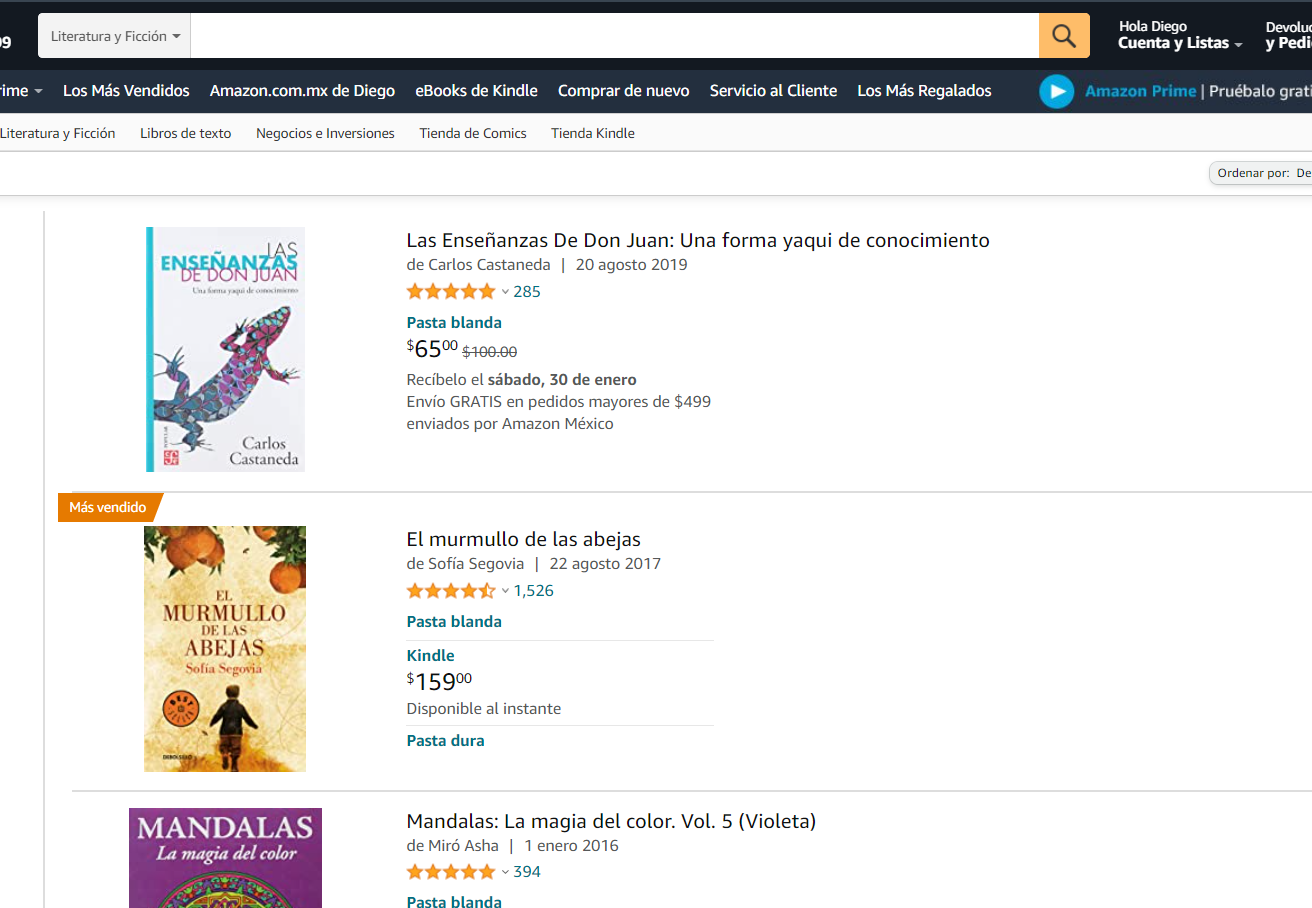

In [32]:
raspado("https://www.amazon.com.mx/s?rh=n%3A9298576011%2Cn%3A%219298577011%2Cn%3A9575666011&page=2&qid=1600445283&ref=lp_9575666011_pg_2")